<a href="https://colab.research.google.com/github/ciara-bates/Asteroid-prediction-model/blob/main/Asteroids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Cleaning Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/ColabNotebooks/Asteroids

/content/drive/MyDrive/ColabNotebooks/Asteroids


In [ ]:
# Loading all the relevant libraries
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, mean_absolute_error, mean_squared_error
import sklearn.linear_model

# libraries for regression types

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

from tensorflow import keras # all for neural network regression
from keras import optimizers  
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

import xgboost as xgb
from sklearn.linear_model import LogisticRegression as logreg


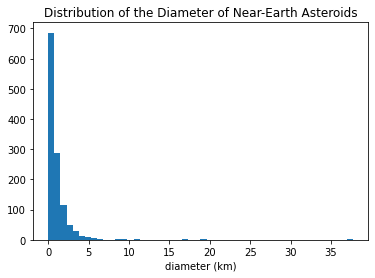

count    1201.000000
mean        1.030211
std         1.665018
min         0.008000
25%         0.308000
50%         0.626000
75%         1.237000
max        37.675000
Name: diameter, dtype: float64

In [ ]:
# uploading the raw data
asteroid_data_raw = pd.read_csv('asteroid_data.csv')
#asteroid_data_raw.info(verbose = True) # output info table on raw data

# Dropping all columns that have more than half NaN values
tooManyNull = asteroid_data_raw.columns[asteroid_data_raw.isna().sum()/asteroid_data_raw.shape[0] > 0.5]
asteroid_data = asteroid_data_raw.drop(tooManyNull,axis=1)

# dropping columns that have object or string datatype
asteroid_data = asteroid_data.drop(['full_name'],axis=1)
asteroid_data = asteroid_data.drop(['pha'],axis=1)
asteroid_data = asteroid_data.drop(['primary_designation'],axis=1)

# Dropping all rows that have one or more NaN values
asteroid_data = asteroid_data.dropna()

# Showing info table again for cleaned data
#asteroid_data.info(verbose = True) 

asteroid_data.corr()['diameter'].abs().sort_values(ascending=False)
plt.hist(asteroid_data['diameter'], bins=50)  # plotting the historgam with 50 bins
plt.xlabel('diameter (km)')  # setting the label for the x axis
plt.title('Distribution of the Diameter of Near-Earth Asteroids')  # setting the label for the x axis
plt.show()
asteroid_data['diameter'].describe()

In [ ]:
# changing the diameter column to log(diameter) as this will be relevant
asteroid_data['diameter']= asteroid_data['diameter'].apply(np.log)
asteroid_data.rename(columns = {'diameter':'log(diameter)'}, inplace = True)

# changing the mean_motion to log(mean_motion)
asteroid_data['mean_motion']= asteroid_data['mean_motion'].apply(np.log)
asteroid_data.rename(columns = {'mean_motion':'log(mean_motion)'}, inplace = True)

# changing the moid_earth to log(moid_earth)
asteroid_data['moid_earth']= asteroid_data['moid_earth'].apply(np.log)
asteroid_data.rename(columns = {'moid_earth':'log(moid_earth)'}, inplace = True)

# Showing all column info again
asteroid_data.info(verbose = True)
asteroid_data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1247
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   log(diameter)         1201 non-null   float64
 1   abs_mag               1201 non-null   float64
 2   albedo                1201 non-null   float64
 3   eccentricity          1201 non-null   float64
 4   semimajor_axis        1201 non-null   float64
 5   periohelion_distance  1201 non-null   float64
 6   inclination_angle     1201 non-null   float64
 7   longitude             1201 non-null   float64
 8   argument_perihelion   1201 non-null   float64
 9   mean_anomely          1201 non-null   float64
 10  aphelion_distance     1201 non-null   float64
 11  log(mean_motion)      1201 non-null   float64
 12  period                1201 non-null   float64
 13  log(moid_earth)       1201 non-null   float64
 14  moid_jupiter          1201 non-null   float64
dtypes: float64(15)
memory

,log(diameter),abs_mag,albedo,eccentricity,semimajor_axis,periohelion_distance,inclination_angle,longitude,argument_perihelion,mean_anomely,aphelion_distance,log(mean_motion),period,log(moid_earth),moid_jupiter
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,-0.542250,19.178127,0.172514,0.503752,1.843665,0.845781,18.347801,173.340152,183.727262,181.851737,2.841550,-0.832634,956.236643,-2.693909,2.550262
std,1.123180,2.404940,0.144120,0.180699,0.643368,0.266841,12.658748,99.936109,104.725154,105.499224,1.206834,0.562858,485.048164,1.342001,1.078664
min,-4.828314,9.230000,0.009000,0.030359,0.626200,0.081255,0.314487,1.229480,0.027661,0.297614,0.999937,-2.189801,180.995718,-9.122733,0.054724
25%,-1.177655,17.530000,0.047000,0.370995,1.317536,0.657461,8.451784,88.603359,93.280010,89.575609,1.796675,-1.266964,552.385565,-3.495496,1.702870
50%,-0.468405,19.100000,0.137000,0.517214,1.805512,0.891286,15.730450,166.365020,187.944471,181.025216,2.735159,-0.900764,886.133439,-2.432734,2.653190
75%,0.212689,20.600000,0.256000,0.632463,2.304764,1.031085,25.496897,255.351947,276.971295,273.774707,3.787042,-0.428142,1278.021450,-1.632829,3.500300
max,3.628997,27.500000,0.856000,0.968606,4.263978,1.299263,71.112911,359.785219,359.876847,358.821259,7.284447,0.687631,3216.035986,-0.344982,4.422650


In [ ]:
# saving all columns as arrays

log_diameter = np.array(asteroid_data['log(diameter)']) # depedant variable = log(diameter)

# all independant variables / features
abs_mag = np.array(asteroid_data['abs_mag'])
albedo = np.array(asteroid_data['albedo'])
eccentricity = np.array(asteroid_data['eccentricity'])
semimajor_axis = np.array(asteroid_data['semimajor_axis'])
periohelion_distance = np.array(asteroid_data['periohelion_distance'])
inclination_angle = np.array(asteroid_data['inclination_angle'])
longitude = np.array(asteroid_data['longitude'])
argument_perihelion = np.array(asteroid_data['argument_perihelion'])
mean_anomely = np.array(asteroid_data['mean_anomely'])
aphelion_distance = np.array(asteroid_data['aphelion_distance'])
log_mean_motion = np.array(asteroid_data['log(mean_motion)'])
sidereal_period = np.array(asteroid_data['period'])
log_moid_earth = np.array(asteroid_data['log(moid_earth)'])
moid_jupiter = np.array(asteroid_data['moid_jupiter'])


# Functions

In [ ]:
def plot(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.histplot(Y_val.values, color ='pink',label='Validation values', ax=ax1)
    sns.histplot(prediction ,color ='skyblue',label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(Y_val,prediction, c='green',label='predictions')
    ax2.plot(Y_val,Y_val,c='purple',label='y=x')
    ax2.set_xlabel('Real Value of log(diameter)')
    ax2.set_ylabel('Predicted value of log(diameter)')
    plt.title('Model output from Validation Dataset - Histogram & Scatter Plot')
    ax1.legend()
    ax2.legend()

def plot_test(prediction):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,7)) 
    sns.histplot(Y_test.values, color ='pink',label='test values', ax=ax1)
    sns.histplot(prediction ,color ='skyblue',label='prediction', ax=ax1)
    ax1.set_xlabel('Distribution plot')
    ax2.scatter(Y_test,prediction, c='green',label='predictions')
    ax2.plot(Y_test,Y_test,c='purple',label='y=x')
    ax2.set_xlabel('Real Value of log(diameter)')
    ax2.set_ylabel('Predicted value of log(diameter)')
    plt.title('Model output from Test Dataset - Histogram and Scatter Plot')
    ax1.legend()
    ax2.legend()


  
def disp_r2_score(score):
    print('R-squared score:', round(score,4))
    return score

def adj_r2_score(score, n, p):
  # n = 1201
  # p = 14
  adj_r2 = 1-(1-score)*(n-1)/(n-p-1)
  return(adj_r2)

def disp_adj_r2_score(score):
    print('Adjusted R-squared score:', round(score,4))
    return score

def disp_RMSE(score):
    print('Root Mean Squared Error:', round(score,4))
    return score
    
def disp_MAE(score):
    print('Mean Absolute Error:', round(score,4))
    return score

def feature_plot(classifier, feature_names, top_features=4):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(18, 7))
 plt.bar(np.arange(2 * top_features), abs(coef[top_coefficients]), color='purple')
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.xlabel('Feature Names')
 plt.ylabel('Absolute value of vector size coefficient')
 plt.title('Feature Importance (from coef_ value)')
 plt.show()

 table_data = abs(coef[top_coefficients])
 pd.DataFrame(table_data)
 print(table_data)


# Initial Analysis

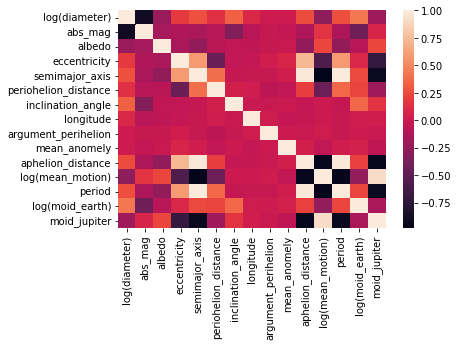

In [ ]:
# Correlation table
asteroid_data.corr()['log(diameter)'].abs().sort_values(ascending=False)


# correlation plot
import seaborn as sns

corr=asteroid_data.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

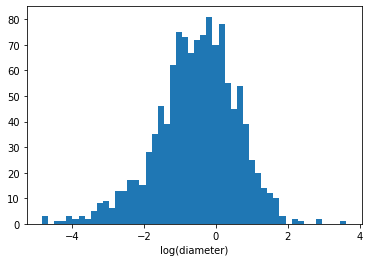

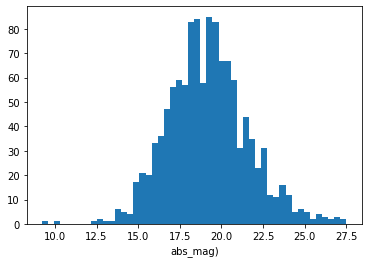

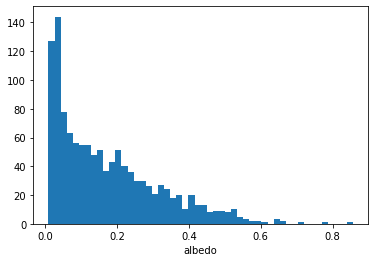

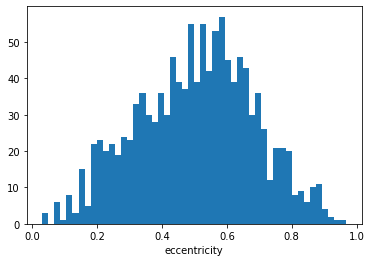

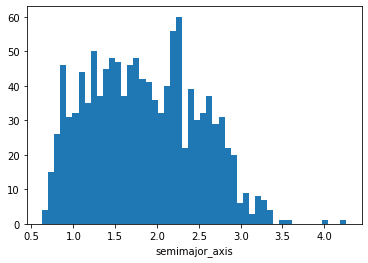

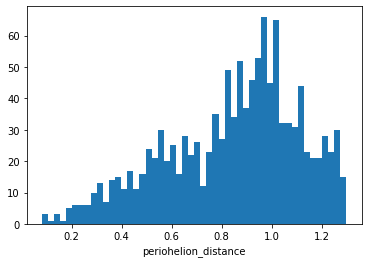

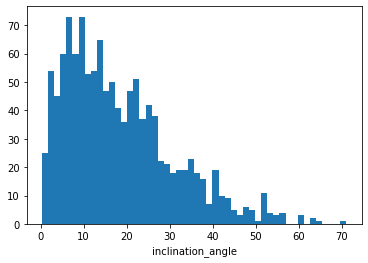

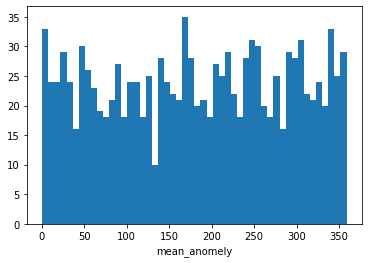

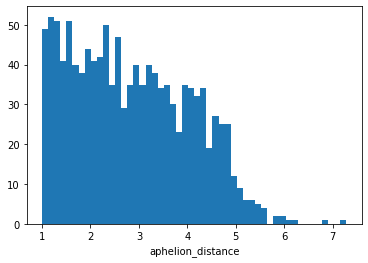

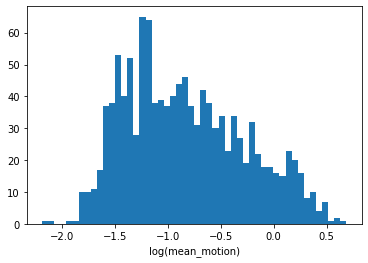

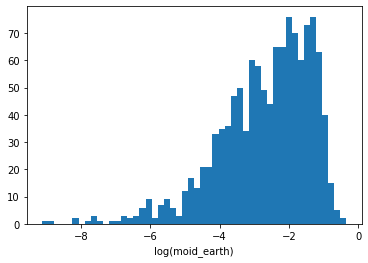

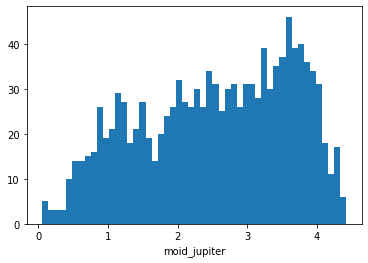

In [ ]:
# plotting all histograms

plt.hist(log_diameter, bins=50)  # plotting the historgam with 50 bins
plt.xlabel('log(diameter)')  # setting the label for the x axis
plt.show()

plt.hist(abs_mag, bins=50)  # plotting the historgam with 50 bins
plt.xlabel('abs_mag)')  # setting the label for the x axis
plt.show()

plt.hist(albedo, bins=50)  # plotting the historgam with 50 bins
plt.xlabel('albedo')  # setting the label for the x axis
plt.show()

plt.hist(eccentricity, bins=50)  # plotting the historgam with 50 bins
plt.xlabel('eccentricity')  # setting the label for the x axis
plt.show()

plt.hist(semimajor_axis, bins=50)  # plotting the historgam with 50 bins
plt.xlabel('semimajor_axis')  # setting the label for the x axis
plt.show()

plt.hist(periohelion_distance, bins=50)  # plotting the historgam with 50 bins
plt.xlabel('periohelion_distance')  # setting the label for the x axis
plt.show()

plt.hist(inclination_angle, bins=50)  # plotting the historgam with 50 bins
plt.xlabel('inclination_angle')  # setting the label for the x axis
plt.show()

plt.hist(mean_anomely, bins=50)  # plotting the historgam with 50 bins
plt.xlabel('mean_anomely')  # setting the label for the x axis
plt.show()

plt.hist(aphelion_distance, bins=50)  # plotting the historgam with 50 bins
plt.xlabel('aphelion_distance')  # setting the label for the x axis
plt.show()

plt.hist(log_mean_motion, bins=50)  # plotting the historgam with 50 bins
plt.xlabel('log(mean_motion)')  # setting the label for the x axis
plt.show()

plt.hist(log_moid_earth, bins=50)  # plotting the historgam with 50 bins
plt.xlabel('log(moid_earth)')  # setting the label for the x axis
plt.show()

plt.hist(asteroid_data['moid_jupiter'], bins=50)  # plotting the historgam with 50 bins
plt.xlabel('moid_jupiter')  # setting the label for the x axis
plt.show()




# Splitting Data
#### 60% train, 20% val, 20% test

In [ ]:
from sklearn.model_selection import train_test_split

predictors = asteroid_data.drop('log(diameter)',axis=1)  # all columns except for log(diameter)
target = asteroid_data['log(diameter)']


X_train, X_test, Y_train, Y_test = train_test_split(predictors,target,test_size=0.4, random_state = 0)

# Use the same function above for the validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,test_size=0.5, random_state= 0) 


In [ ]:
#from sklearn import preprocessing

#Input standard normalization:
##std_scaler = preprocessing.StandardScaler().fit(X_train)

#def scaler(X):
    #x_norm_arr= std_scaler.fit_transform(X)
    #return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

#X_train_norm = scaler(X_train)
#X_test_norm = scaler(X_test)

#def inverse_scaler(X):
    #x_norm_arr= std_scaler.inverse_transform(X)
    #return pd.DataFrame(x_norm_arr, columns=X.columns, index = X.index)

# Normalising Data

In [ ]:
#Standardise the dataset (aka Normalise - mean=0, std=1)
#Only the X data needs to be standardised
#Standardise all stes (training, validation and testing)


#Calculate mean and std of training data set
means = X_train.mean(axis=0)
std = X_train.std(axis=0)

#Standardise all datasets
X_train_standardised = (X_train - means)/std
X_val_standardised = (X_val - means)/std
X_test_standardised = (X_test - means)/std

#Output the data to inspect the results (mean should equal 0, std should equal 1)
print(X_train_standardised.head())
print(X_train_standardised['period'].std())
print(X_train_standardised['period'].mean())

lst = X_train_standardised.columns.values
print(lst)

count_std = 0
count_mean = 0

for i in lst:
  std_para = X_train_standardised[i].std()
  mean_para = X_train_standardised[i].mean()

  if std_para > 0.99 and std_para < 1.01:
    count_std += 1
  
  if mean_para > -0.1 and mean_para < 0.1:
    count_mean += 1

  if count_std == lst.size:
    print("All std = 1")

  if count_mean == lst.size:
    print("All means = 0")

       abs_mag    albedo  eccentricity  semimajor_axis  periohelion_distance  \
990   0.572405  0.274196     -0.696477       -0.253273              0.720548   
103  -0.485837 -0.558032      0.580725       -0.446181             -0.904174   
1236  0.700937 -0.558032      0.284592       -1.369795             -1.642903   
1030 -0.455846 -0.953340      0.544012        1.570462              1.182129   
953   0.182527  0.433706     -0.913567       -1.290638             -0.765533   

      inclination_angle  longitude  argument_perihelion  mean_anomely  \
990           -0.532748   1.593805             0.530534      1.558656   
103           -0.759392  -0.027441             0.540621     -1.695618   
1236           0.947980  -1.479352            -0.482289      0.217164   
1030          -0.391045   1.045979             1.622567      0.836082   
953            0.405379   0.293259             0.989596     -0.599927   

      aphelion_distance  log(mean_motion)    period  log(moid_earth)  \
990     

# Decision Tree regression

In [ ]:
regression_names = [] # creating empty lists for algorithm comparisons
regression_r2_scores = []
regression_adj_r2_scores = []
RMSE_list = []
MAE_list = []

R-squared score: 0.9319
Adjusted R-squared score: 0.9311
Root Mean Squared Error: 0.2938
Mean Absolute Error: 0.2178


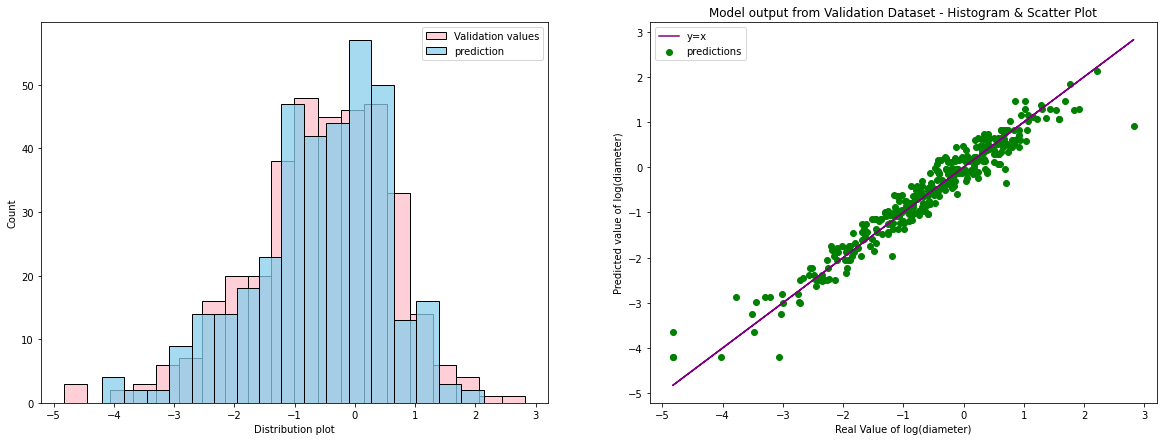

In [ ]:
decTree = tree.DecisionTreeRegressor()
decTree = decTree.fit(X_train_standardised,Y_train) # training
Y_predicted_tree = decTree.predict(X_val_standardised) # predicting

r2_score_tree = r2_score(Y_predicted_tree,Y_val)
disp_r2_score(r2_score_tree)

adj_r2_score_tree = adj_r2_score(r2_score_tree, len(asteroid_data), len(asteroid_data.columns)-1)
disp_adj_r2_score(adj_r2_score_tree)

RMSE_tree = math.sqrt(mean_squared_error(Y_val, Y_predicted_tree))
disp_RMSE(RMSE_tree)

MAE_tree = mean_absolute_error(Y_val, Y_predicted_tree)
disp_MAE(MAE_tree)

plot(Y_predicted_tree)

regression_names.append('Decision Tree')
regression_r2_scores.append(r2_score_tree)
regression_adj_r2_scores.append(adj_r2_score_tree)
RMSE_list.append(RMSE_tree)
MAE_list.append(MAE_tree)

# Random Forest regression:

R-squared score: 0.9541
Adjusted R-squared score: 0.9536
Root Mean Squared Error: 0.2321
Mean Absolute Error: 0.1515


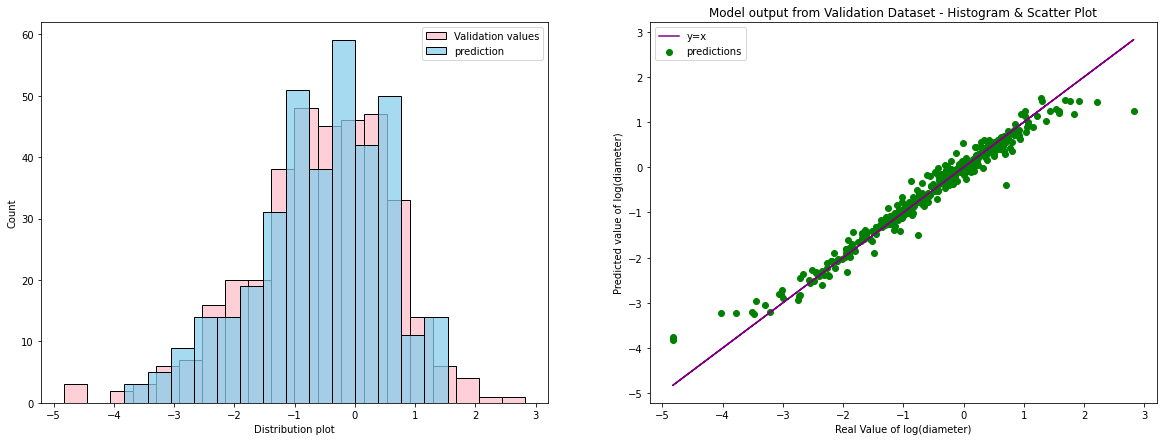

In [ ]:
forest = RandomForestRegressor(max_depth=32, n_estimators=50)
forest.fit(X_train_standardised,np.ravel(Y_train)) # training
Y_predicted_forest = forest.predict(X_val_standardised) # valing

r2_score_forest = r2_score(Y_predicted_forest,Y_val)
disp_r2_score(r2_score_forest)

adj_r2_score_forest = adj_r2_score(r2_score_forest, len(asteroid_data), len(asteroid_data.columns)-1)
disp_adj_r2_score(adj_r2_score_forest)

RMSE_forest = math.sqrt(mean_squared_error(Y_val, Y_predicted_forest))
disp_RMSE(RMSE_forest)

MAE_forest = mean_absolute_error(Y_val, Y_predicted_forest)
disp_MAE(MAE_forest)

plot(Y_predicted_forest)


regression_names.append('Random Forest')
regression_r2_scores.append(r2_score_forest)
regression_adj_r2_scores.append(adj_r2_score_forest)
RMSE_list.append(RMSE_forest)
MAE_list.append(MAE_forest)

# Linear Regression

R-squared score: 0.9588
Adjusted R-squared score: 0.9583
Root Mean Squared Error: 0.2358
Mean Absolute Error: 0.1863


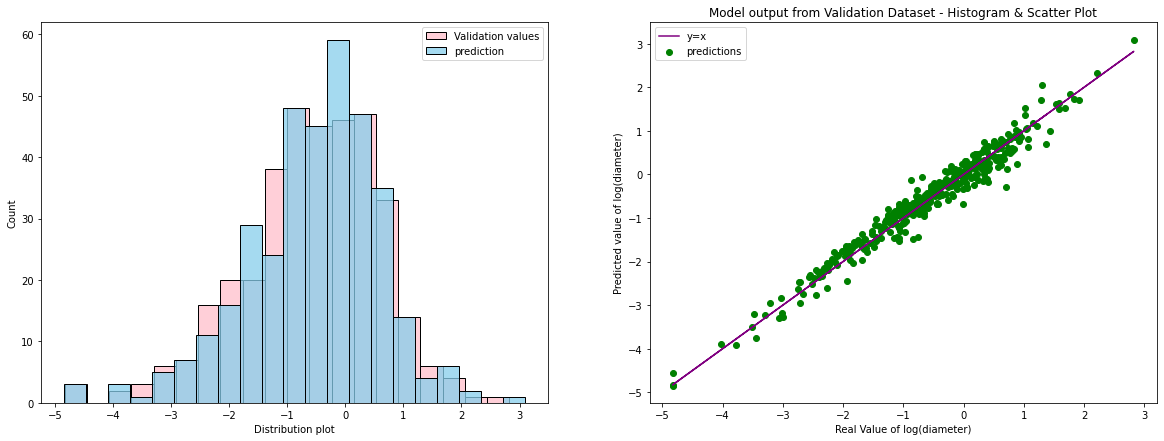

In [ ]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
Y_predicted_lr = lr.predict(X_val)

r2_score_lr = r2_score(Y_predicted_lr,Y_val)
disp_r2_score(r2_score_lr)

adj_r2_score_lr = adj_r2_score(r2_score_lr, len(asteroid_data), len(asteroid_data.columns)-1)
disp_adj_r2_score(adj_r2_score_lr)

RMSE_lr = math.sqrt(mean_squared_error(Y_val, Y_predicted_lr))
disp_RMSE(RMSE_lr)

MAE_lr = mean_absolute_error(Y_val, Y_predicted_lr)
disp_MAE(MAE_lr)

plot(Y_predicted_lr)

regression_names.append('Linear Regression')
regression_r2_scores.append(r2_score_lr)
regression_adj_r2_scores.append(adj_r2_score_lr)
RMSE_list.append(RMSE_lr)
MAE_list.append(MAE_lr)


# Support Vector Machine Regression

R-squared score: 0.9598
Adjusted R-squared score: 0.9594
Root Mean Squared Error: 0.2355
Mean Absolute Error: 0.1825


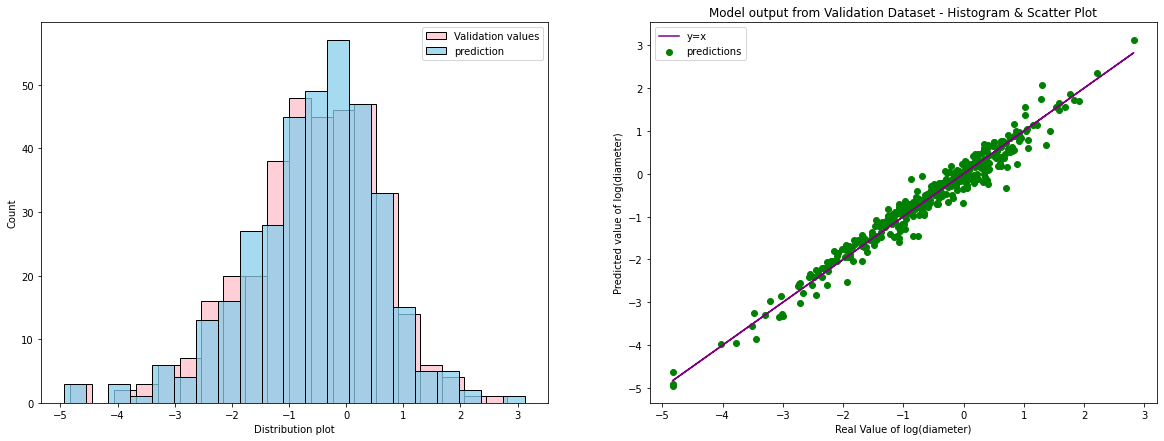

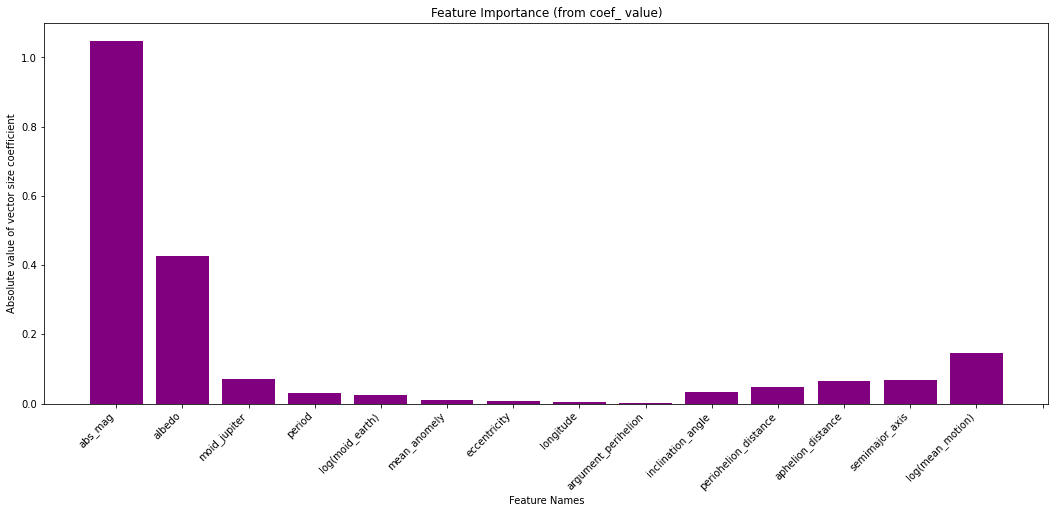

[1.04693592 0.4268887  0.07123761 0.03177625 0.02516592 0.01094836
 0.00875628 0.00465915 0.00282993 0.03497411 0.0476395  0.0647405
 0.06969293 0.1467638 ]


In [ ]:
svmreg = svm.SVR(kernel = 'linear')
svmreg.fit(X_train_standardised,np.ravel(Y_train)) # training
Y_predicted_svm = svmreg.predict(X_val_standardised) # predicting from validation data

r2_score_svm = r2_score(Y_predicted_svm,Y_val)
disp_r2_score(r2_score_svm)

adj_r2_score_svm = adj_r2_score(r2_score_svm,len(asteroid_data), len(asteroid_data.columns)-1)
disp_adj_r2_score(adj_r2_score_svm)

RMSE_svm = math.sqrt(mean_squared_error(Y_val, Y_predicted_svm))
disp_RMSE(RMSE_svm)

MAE_svm = mean_absolute_error(Y_val, Y_predicted_svm)
disp_MAE(MAE_svm)

plot(Y_predicted_svm)

regression_names.append('Support Vector Machine')
regression_r2_scores.append(r2_score_svm)
regression_adj_r2_scores.append(adj_r2_score_svm)
RMSE_list.append(RMSE_svm)
MAE_list.append(MAE_svm)

feature_plot(svmreg, asteroid_data.drop(['log(diameter)'], axis = 1).columns.values, top_features=7)


# Which Regression is best?

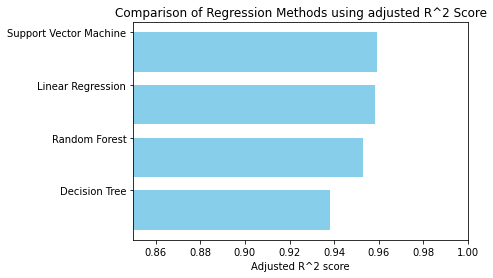

In [ ]:
x = regression_names
y = regression_adj_r2_scores

fig, ax = plt.subplots()    
width = 0.75
ind = np.arange(len(y))
ax.barh(ind, y, width, color="skyblue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Comparison of Regression Methods using adjusted R^2 Score')
plt.xlabel('Adjusted R^2 score')  
plt.xlim(0.85, 1)   
plt.show()


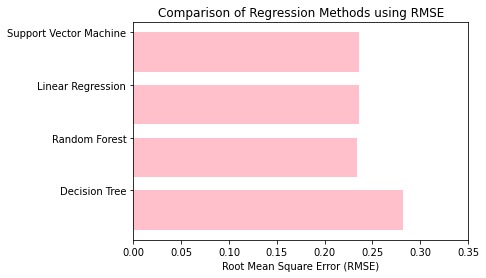

In [ ]:
x = regression_names
y = RMSE_list

fig, ax = plt.subplots()    
width = 0.75
ind = np.arange(len(y))
ax.barh(ind, y, width, color="pink")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Comparison of Regression Methods using RMSE')
plt.xlabel('Root Mean Square Error (RMSE)')  
plt.xlim(0, 0.35)   
plt.show()

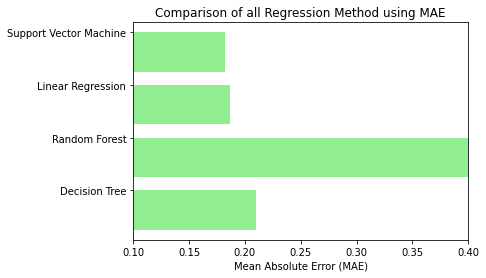

In [ ]:
x = regression_names
y = MAE_list

fig, ax = plt.subplots()    
width = 0.75
ind = np.arange(len(y))
ax.barh(ind, y, width, color="lightgreen")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Comparison of all Regression Method using MAE')
plt.xlabel('Mean Absolute Error (MAE)')  
plt.xlim(0.1, 0.4)   
plt.show()


In [ ]:
table_data = list(zip(regression_names,regression_adj_r2_scores, RMSE_list, MAE_list))
pd.DataFrame(table_data, columns=['Regression Name','Adjusted R^2 Score', 'Root Mean Square Error', 'Mean Absolute Error'])

,Regression Name,Adjusted R^2 Score,Root Mean Square Error,Mean Absolute Error
0,Decision Tree,0.937977,0.281524,0.210267
1,Random Forest,0.953065,0.234109,1.253250
2,Linear Regression,0.958319,0.235844,0.186304
3,Support Vector Machine,0.959358,0.235465,0.182457


# SVM exploring Kernal types (using validation dataset)

In [ ]:
svm_list_names = []
svm_list_adj_r2 = []
svm_list_RMSE = []
svm_list_MAE= []

In [ ]:
# SVM with linear kernal 

svmreg_linear = svm.SVR(kernel = 'linear')
svmreg_linear.fit(X_train_standardised,np.ravel(Y_train)) # training
Y_predicted_svm_linear = svmreg_linear.predict(X_val_standardised) # predicting test data
#plot(Y_predicted_svm_linear)

r2_score_svm_linear = r2_score(Y_predicted_svm_linear,Y_val)
disp_r2_score(r2_score_svm_linear)

adj_r2_score_svm_linear = adj_r2_score(r2_score_svm_linear,len(asteroid_data), len(asteroid_data.columns)-1)
disp_adj_r2_score(adj_r2_score_svm_linear)

RMSE_svm_linear = math.sqrt(mean_squared_error(Y_val, Y_predicted_svm_linear))
disp_RMSE(RMSE_svm_linear)

MAE_svm_linear = mean_absolute_error(Y_val, Y_predicted_svm_linear)
disp_MAE(MAE_svm_linear)

svm_list_names.append('Linear')
svm_list_adj_r2.append(r2_score_svm_linear)
svm_list_RMSE.append(RMSE_svm_linear)
svm_list_MAE.append(MAE_svm_linear)


R-squared score: 0.9598
Adjusted R-squared score: 0.9594
Root Mean Squared Error: 0.2355
Mean Absolute Error: 0.1825


In [ ]:
# SVM with Polynomial kernal (default parameter=3)
svmreg_poly = svm.SVR(kernel = 'poly')
svmreg_poly.fit(X_train_standardised,np.ravel(Y_train)) # training
Y_predicted_svm_poly = svmreg_poly.predict(X_val_standardised) # predicting test data
#plot(Y_predicted_svm_poly)

r2_score_svm_poly = r2_score(Y_predicted_svm_poly,Y_val)
disp_r2_score(r2_score_svm_poly)

adj_r2_score_svm_poly = adj_r2_score(r2_score_svm_poly,len(asteroid_data), len(asteroid_data.columns)-1)
disp_adj_r2_score(adj_r2_score_svm_poly)

RMSE_svm_poly = math.sqrt(mean_squared_error(Y_val, Y_predicted_svm_poly))
disp_RMSE(RMSE_svm_poly)

MAE_svm_poly = mean_absolute_error(Y_val, Y_predicted_svm_poly)
disp_MAE(MAE_svm_poly)

svm_list_names.append('Polynomial')
svm_list_adj_r2.append(r2_score_svm_poly)
svm_list_RMSE.append(RMSE_svm_poly)
svm_list_MAE.append(MAE_svm_poly)

R-squared score: 0.7866
Adjusted R-squared score: 0.784
Root Mean Squared Error: 0.616
Mean Absolute Error: 0.4219


In [ ]:
# SVM with rbf kernal
svmreg_rbf = svm.SVR(kernel = 'rbf')
svmreg_rbf.fit(X_train_standardised,np.ravel(Y_train)) # training
Y_predicted_svm_rbf = svmreg_rbf.predict(X_val_standardised) # predicting test data
#plot(Y_predicted_svm_rbf)

r2_score_svm_rbf = r2_score(Y_predicted_svm_rbf,Y_val)
disp_r2_score(r2_score_svm_rbf)

adj_r2_score_svm_rbf = adj_r2_score(r2_score_svm_rbf,len(asteroid_data), len(asteroid_data.columns)-1)
disp_adj_r2_score(adj_r2_score_svm_rbf)

RMSE_svm_rbf = math.sqrt(mean_squared_error(Y_val, Y_predicted_svm_rbf))
disp_RMSE(RMSE_svm_rbf)

MAE_svm_rbf = mean_absolute_error(Y_val, Y_predicted_svm_rbf)
disp_MAE(MAE_svm_rbf)

svm_list_names.append('RBF')
svm_list_adj_r2.append(r2_score_svm_rbf)
svm_list_RMSE.append(RMSE_svm_rbf)
svm_list_MAE.append(MAE_svm_rbf)

R-squared score: 0.846
Adjusted R-squared score: 0.8442
Root Mean Squared Error: 0.3904
Mean Absolute Error: 0.2533


In [ ]:
# SVM with Sigmoid kernal
svmreg_sigmoid = svm.SVR(kernel = 'sigmoid')
svmreg_sigmoid.fit(X_train_standardised,np.ravel(Y_train)) # training
Y_predicted_svm_sigmoid = svmreg_sigmoid.predict(X_val_standardised) # predicting test data
#plot(Y_predicted_svm_sigmoid)

r2_score_svm_sigmoid = r2_score(Y_predicted_svm_sigmoid,Y_val)
disp_r2_score(r2_score_svm_sigmoid)

adj_r2_score_svm_sigmoid = adj_r2_score(r2_score_svm_sigmoid,len(asteroid_data), len(asteroid_data.columns)-1)
disp_adj_r2_score(adj_r2_score_svm_sigmoid)

RMSE_svm_sigmoid = math.sqrt(mean_squared_error(Y_val, Y_predicted_svm_sigmoid))
disp_RMSE(RMSE_svm_sigmoid)

MAE_svm_sigmoid = mean_absolute_error(Y_val, Y_predicted_svm_sigmoid)
disp_MAE(MAE_svm_sigmoid)

svm_list_names.append('Sigmoid')
svm_list_adj_r2.append(r2_score_svm_sigmoid)
svm_list_RMSE.append(RMSE_svm_sigmoid)
svm_list_MAE.append(MAE_svm_sigmoid)


R-squared score: 0.1484
Adjusted R-squared score: 0.1384
Root Mean Squared Error: 3.4507
Mean Absolute Error: 2.431


In [ ]:
# comparing all kernal types in a table
table_data = list(zip(svm_list_names,svm_list_adj_r2,svm_list_RMSE,svm_list_MAE))
pd.DataFrame(table_data, columns=['Kernal Type','Adjusted R^2 Score', 'Root Mean Square Error', 'Mean Absolute Error'])

,Kernal Type,Adjusted R^2 Score,Root Mean Square Error,Mean Absolute Error
0,Linear,0.959832,0.235465,0.182457
1,Polynomial,0.786565,0.616005,0.421906
2,RBF,0.845979,0.390412,0.253288
3,Sigmoid,0.148449,3.450662,2.431044


# SVM - feature selection (using validation dataset)

In [ ]:
feature_selection_number = []
feature_selection_adj_r2 = []
feature_selection_RMSE = []
feature_selection_MAE= []

In [ ]:
# SVM linear with 14 most significant features
X_train_standardised_14 = X_train_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)','semimajor_axis', 'periohelion_distance', 'inclination_angle', 'eccentricity', 'argument_perihelion', 'log(mean_motion)','mean_anomely','longitude']]
X_val_standardised_14 = X_val_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)','semimajor_axis', 'periohelion_distance', 'inclination_angle', 'eccentricity', 'argument_perihelion', 'log(mean_motion)','mean_anomely','longitude']]

svmreg14 = svm.SVR(kernel = 'linear')
svmreg14.fit(X_train_standardised_14,np.ravel(Y_train)) # training
Y_predicted_svm_14 = svmreg14.predict(X_val_standardised_14) # predicting from validation data

#plot(Y_predicted_svm_2)

r2_score_svm_14= r2_score(Y_predicted_svm_14,Y_val)
disp_r2_score(r2_score_svm_14)

adj_r2_score_svm_14 = adj_r2_score(r2_score_svm_14,len(asteroid_data), 14)
disp_adj_r2_score(adj_r2_score_svm_14)

RMSE_svm_14 = math.sqrt(mean_squared_error(Y_val, Y_predicted_svm_14))
disp_RMSE(RMSE_svm_14)

MAE_svm_14 = mean_absolute_error(Y_val, Y_predicted_svm_14)
disp_MAE(MAE_svm_14)

feature_selection_number.append('14')
feature_selection_adj_r2.append(r2_score_svm_14)
feature_selection_RMSE.append(RMSE_svm_14)
feature_selection_MAE.append(MAE_svm_14)

R-squared score: 0.9604
Adjusted R-squared score: 0.96
Root Mean Squared Error: 0.2333
Mean Absolute Error: 0.1814


In [ ]:
# SVM linear with 13 most significant features
# SVM linear with 13 most significant features
X_train_standardised_13 = X_train_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)','semimajor_axis', 'periohelion_distance', 'inclination_angle', 'eccentricity', 'argument_perihelion', 'log(mean_motion)','mean_anomely']]
X_val_standardised_13 = X_val_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)','semimajor_axis', 'periohelion_distance', 'inclination_angle', 'eccentricity', 'argument_perihelion', 'log(mean_motion)','mean_anomely']]

svmreg13 = svm.SVR(kernel = 'linear')
svmreg13.fit(X_train_standardised_13,np.ravel(Y_train)) # training
Y_predicted_svm_13 = svmreg13.predict(X_val_standardised_13) # predicting from validation data

#plot(Y_predicted_svm_2)

r2_score_svm_13= r2_score(Y_predicted_svm_13,Y_val)
disp_r2_score(r2_score_svm_13)

adj_r2_score_svm_13 = adj_r2_score(r2_score_svm_13,len(asteroid_data), 13)
disp_adj_r2_score(adj_r2_score_svm_13)

RMSE_svm_13 = math.sqrt(mean_squared_error(Y_val, Y_predicted_svm_13))
disp_RMSE(RMSE_svm_13)

MAE_svm_13 = mean_absolute_error(Y_val, Y_predicted_svm_13)
disp_MAE(MAE_svm_13)

feature_selection_number.append('13')
feature_selection_adj_r2.append(r2_score_svm_13)
feature_selection_RMSE.append(RMSE_svm_13)
feature_selection_MAE.append(MAE_svm_13)

R-squared score: 0.9604
Adjusted R-squared score: 0.96
Root Mean Squared Error: 0.2338
Mean Absolute Error: 0.1802


In [ ]:
# SVM linear with 12 most significant features
X_train_standardised_12 = X_train_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)','semimajor_axis', 'periohelion_distance', 'inclination_angle', 'eccentricity', 'argument_perihelion', 'log(mean_motion)']]
X_val_standardised_12 = X_val_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)','semimajor_axis', 'periohelion_distance', 'inclination_angle', 'eccentricity', 'argument_perihelion', 'log(mean_motion)']]

svmreg12 = svm.SVR(kernel = 'linear')
svmreg12.fit(X_train_standardised_12,np.ravel(Y_train)) # training
Y_predicted_svm_12 = svmreg12.predict(X_val_standardised_12) # predicting from validation data

#plot(Y_predicted_svm_2)

r2_score_svm_12= r2_score(Y_predicted_svm_12,Y_val)
disp_r2_score(r2_score_svm_12)

adj_r2_score_svm_12 = adj_r2_score(r2_score_svm_12,len(asteroid_data), 12)
disp_adj_r2_score(adj_r2_score_svm_12)

RMSE_svm_12 = math.sqrt(mean_squared_error(Y_val, Y_predicted_svm_12))
disp_RMSE(RMSE_svm_12)

MAE_svm_12 = mean_absolute_error(Y_val, Y_predicted_svm_12)
disp_MAE(MAE_svm_12)

feature_selection_number.append('12')
feature_selection_adj_r2.append(r2_score_svm_12)
feature_selection_RMSE.append(RMSE_svm_12)
feature_selection_MAE.append(MAE_svm_12)

R-squared score: 0.9603
Adjusted R-squared score: 0.9599
Root Mean Squared Error: 0.2349
Mean Absolute Error: 0.1802


In [ ]:
# SVM linear with 11 most significant features
X_train_standardised_11 = X_train_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)','semimajor_axis', 'periohelion_distance', 'inclination_angle', 'eccentricity', 'argument_perihelion']]
X_val_standardised_11 = X_val_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)','semimajor_axis', 'periohelion_distance', 'inclination_angle', 'eccentricity', 'argument_perihelion']]

svmreg11 = svm.SVR(kernel = 'linear')
svmreg11.fit(X_train_standardised_11,np.ravel(Y_train)) # training
Y_predicted_svm_11 = svmreg11.predict(X_val_standardised_11) # predicting from validation data

#plot(Y_predicted_svm_2)

r2_score_svm_11= r2_score(Y_predicted_svm_11,Y_val)
disp_r2_score(r2_score_svm_11)

adj_r2_score_svm_11 = adj_r2_score(r2_score_svm_11,len(asteroid_data), 11)
disp_adj_r2_score(adj_r2_score_svm_11)

RMSE_svm_11 = math.sqrt(mean_squared_error(Y_val, Y_predicted_svm_11))
disp_RMSE(RMSE_svm_11)

MAE_svm_11 = mean_absolute_error(Y_val, Y_predicted_svm_11)
disp_MAE(MAE_svm_11)

feature_selection_number.append('11')
feature_selection_adj_r2.append(r2_score_svm_11)
feature_selection_RMSE.append(RMSE_svm_11)
feature_selection_MAE.append(MAE_svm_11)

R-squared score: 0.9603
Adjusted R-squared score: 0.9599
Root Mean Squared Error: 0.2349
Mean Absolute Error: 0.1802


In [ ]:
# SVM linear with 10 most significant features
X_train_standardised_10 = X_train_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)','semimajor_axis', 'periohelion_distance', 'inclination_angle', 'eccentricity']]
X_val_standardised_10 = X_val_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)','semimajor_axis', 'periohelion_distance', 'inclination_angle', 'eccentricity']]

svmreg10 = svm.SVR(kernel = 'linear')
svmreg10.fit(X_train_standardised_10,np.ravel(Y_train)) # training
Y_predicted_svm_10 = svmreg10.predict(X_val_standardised_10) # predicting from validation data

#plot(Y_predicted_svm_2)

r2_score_svm_10= r2_score(Y_predicted_svm_10,Y_val)
disp_r2_score(r2_score_svm_10)

adj_r2_score_svm_10 = adj_r2_score(r2_score_svm_10,len(asteroid_data), 10)
disp_adj_r2_score(adj_r2_score_svm_10)

RMSE_svm_10 = math.sqrt(mean_squared_error(Y_val, Y_predicted_svm_10))
disp_RMSE(RMSE_svm_10)

MAE_svm_10 = mean_absolute_error(Y_val, Y_predicted_svm_10)
disp_MAE(MAE_svm_10)

feature_selection_number.append('10')
feature_selection_adj_r2.append(r2_score_svm_10)
feature_selection_RMSE.append(RMSE_svm_10)
feature_selection_MAE.append(MAE_svm_10)

R-squared score: 0.9603
Adjusted R-squared score: 0.96
Root Mean Squared Error: 0.2345
Mean Absolute Error: 0.1801


In [ ]:
# SVM linear with 9 most significant features
X_train_standardised_9 = X_train_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)','semimajor_axis', 'periohelion_distance', 'inclination_angle']]
X_val_standardised_9 = X_val_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)','semimajor_axis', 'periohelion_distance', 'inclination_angle']]

svmreg9 = svm.SVR(kernel = 'linear')
svmreg9.fit(X_train_standardised_9,np.ravel(Y_train)) # training
Y_predicted_svm_9 = svmreg9.predict(X_val_standardised_9) # predicting from validation data

#plot(Y_predicted_svm_2)

r2_score_svm_9= r2_score(Y_predicted_svm_9,Y_val)
disp_r2_score(r2_score_svm_9)

adj_r2_score_svm_9 = adj_r2_score(r2_score_svm_9,len(asteroid_data), 9)
disp_adj_r2_score(adj_r2_score_svm_9)

RMSE_svm_9 = math.sqrt(mean_squared_error(Y_val, Y_predicted_svm_9))
disp_RMSE(RMSE_svm_9)

MAE_svm_9 = mean_absolute_error(Y_val, Y_predicted_svm_9)
disp_MAE(MAE_svm_9)

feature_selection_number.append('9')
feature_selection_adj_r2.append(r2_score_svm_9)
feature_selection_RMSE.append(RMSE_svm_9)
feature_selection_MAE.append(MAE_svm_9)

R-squared score: 0.9605
Adjusted R-squared score: 0.9602
Root Mean Squared Error: 0.234
Mean Absolute Error: 0.1804


In [ ]:
# SVM linear with 8 most significant features

X_train_standardised_8 = X_train_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)','semimajor_axis', 'periohelion_distance']]
X_val_standardised_8 = X_val_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)','semimajor_axis', 'periohelion_distance']]

svmreg8 = svm.SVR(kernel = 'linear')
svmreg8.fit(X_train_standardised_8,np.ravel(Y_train)) # training
Y_predicted_svm_8 = svmreg8.predict(X_val_standardised_8) # predicting from validation data

#plot(Y_predicted_svm_2)

r2_score_svm_8= r2_score(Y_predicted_svm_8,Y_val)
disp_r2_score(r2_score_svm_8)

adj_r2_score_svm_8 = adj_r2_score(r2_score_svm_8,len(asteroid_data), 8)
disp_adj_r2_score(adj_r2_score_svm_8)

RMSE_svm_8 = math.sqrt(mean_squared_error(Y_val, Y_predicted_svm_8))
disp_RMSE(RMSE_svm_8)

MAE_svm_8 = mean_absolute_error(Y_val, Y_predicted_svm_8)
disp_MAE(MAE_svm_8)

feature_selection_number.append('8')
feature_selection_adj_r2.append(r2_score_svm_8)
feature_selection_RMSE.append(RMSE_svm_8)
feature_selection_MAE.append(MAE_svm_8)

R-squared score: 0.9607
Adjusted R-squared score: 0.9605
Root Mean Squared Error: 0.2338
Mean Absolute Error: 0.1812


In [ ]:
# SVM linear with 7 most significant features

X_train_standardised_7 = X_train_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)','semimajor_axis']]
X_val_standardised_7 = X_val_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)','semimajor_axis' ]]

svmreg7 = svm.SVR(kernel = 'linear')
svmreg7.fit(X_train_standardised_7,np.ravel(Y_train)) # training
Y_predicted_svm_7 = svmreg7.predict(X_val_standardised_7) # predicting from validation data

#plot(Y_predicted_svm_2)

r2_score_svm_7= r2_score(Y_predicted_svm_7,Y_val)
disp_r2_score(r2_score_svm_7)

adj_r2_score_svm_7 = adj_r2_score(r2_score_svm_7,len(asteroid_data), 7)
disp_adj_r2_score(adj_r2_score_svm_7)

RMSE_svm_7 = math.sqrt(mean_squared_error(Y_val, Y_predicted_svm_7))
disp_RMSE(RMSE_svm_7)

MAE_svm_7 = mean_absolute_error(Y_val, Y_predicted_svm_7)
disp_MAE(MAE_svm_7)

feature_selection_number.append('7')
feature_selection_adj_r2.append(r2_score_svm_7)
feature_selection_RMSE.append(RMSE_svm_7)
feature_selection_MAE.append(MAE_svm_7)

R-squared score: 0.9607
Adjusted R-squared score: 0.9605
Root Mean Squared Error: 0.2337
Mean Absolute Error: 0.1811


In [ ]:
# SVM linear with 6 most significant features

X_train_standardised_6 = X_train_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)']]
X_val_standardised_6 = X_val_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter','log(mean_motion)']]

svmreg6 = svm.SVR(kernel = 'linear')
svmreg6.fit(X_train_standardised_6,np.ravel(Y_train)) # training
Y_predicted_svm_6 = svmreg6.predict(X_val_standardised_6) # predicting from validation data

#plot(Y_predicted_svm_2)

r2_score_svm_6= r2_score(Y_predicted_svm_6,Y_val)
disp_r2_score(r2_score_svm_6)

adj_r2_score_svm_6 = adj_r2_score(r2_score_svm_6,len(asteroid_data), 6)
disp_adj_r2_score(adj_r2_score_svm_6)

RMSE_svm_6 = math.sqrt(mean_squared_error(Y_val, Y_predicted_svm_6))
disp_RMSE(RMSE_svm_6)

MAE_svm_6 = mean_absolute_error(Y_val, Y_predicted_svm_6)
disp_MAE(MAE_svm_6)

feature_selection_number.append('6')
feature_selection_adj_r2.append(r2_score_svm_6)
feature_selection_RMSE.append(RMSE_svm_6)
feature_selection_MAE.append(MAE_svm_6)


R-squared score: 0.9607
Adjusted R-squared score: 0.9605
Root Mean Squared Error: 0.2335
Mean Absolute Error: 0.1809


In [ ]:
# SVM linear with 5 most significant features

X_train_standardised_5 = X_train_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter']]
X_val_standardised_5 = X_val_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance', 'moid_jupiter']]

svmreg5 = svm.SVR(kernel = 'linear')
svmreg5.fit(X_train_standardised_5,np.ravel(Y_train)) # training
Y_predicted_svm_5 = svmreg5.predict(X_val_standardised_5) # predicting from validation data

#plot(Y_predicted_svm_2)

r2_score_svm_5= r2_score(Y_predicted_svm_5,Y_val)
disp_r2_score(r2_score_svm_5)

adj_r2_score_svm_5 = adj_r2_score(r2_score_svm_5,len(asteroid_data), 5)
disp_adj_r2_score(adj_r2_score_svm_5)

RMSE_svm_5 = math.sqrt(mean_squared_error(Y_val, Y_predicted_svm_5))
disp_RMSE(RMSE_svm_5)

MAE_svm_5 = mean_absolute_error(Y_val, Y_predicted_svm_5)
disp_MAE(MAE_svm_5)

feature_selection_number.append('5')
feature_selection_adj_r2.append(r2_score_svm_5)
feature_selection_RMSE.append(RMSE_svm_5)
feature_selection_MAE.append(MAE_svm_5)


R-squared score: 0.9606
Adjusted R-squared score: 0.9604
Root Mean Squared Error: 0.2335
Mean Absolute Error: 0.1816


R-squared score: 0.9606
Adjusted R-squared score: 0.9604
Root Mean Squared Error: 0.2328
Mean Absolute Error: 0.1808


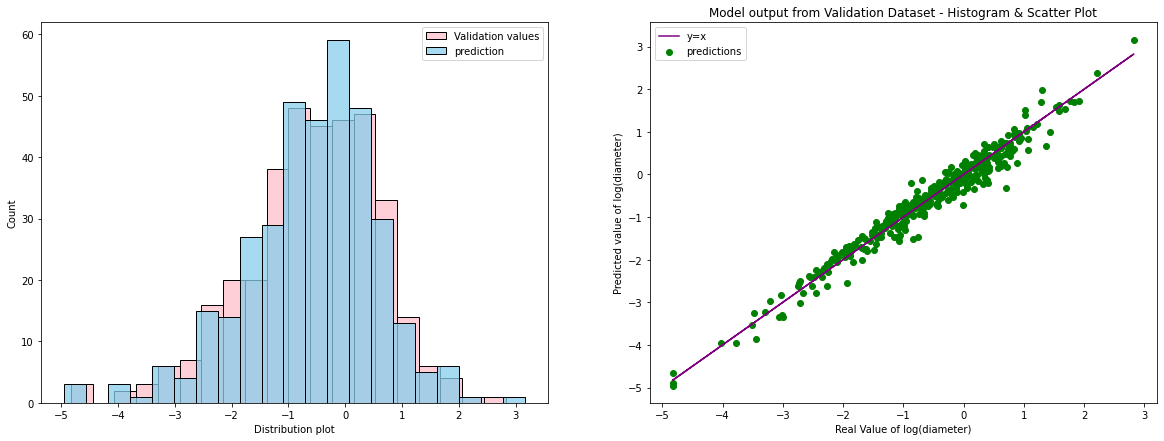

In [ ]:
# SVM linear with 4 most significant features

X_train_standardised_4 = X_train_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance']]
X_val_standardised_4 = X_val_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance']]

svmreg4 = svm.SVR(kernel = 'linear')
svmreg4.fit(X_train_standardised_4,np.ravel(Y_train)) # training
Y_predicted_svm_4 = svmreg4.predict(X_val_standardised_4) # predicting from validation data

plot(Y_predicted_svm_4)

r2_score_svm_4= r2_score(Y_predicted_svm_4,Y_val)
disp_r2_score(r2_score_svm_4)

adj_r2_score_svm_4 = adj_r2_score(r2_score_svm_4,len(asteroid_data), 4)
disp_adj_r2_score(adj_r2_score_svm_4)

RMSE_svm_4 = math.sqrt(mean_squared_error(Y_val, Y_predicted_svm_4))
disp_RMSE(RMSE_svm_4)

MAE_svm_4 = mean_absolute_error(Y_val, Y_predicted_svm_4)
disp_MAE(MAE_svm_4)

feature_selection_number.append('4')
feature_selection_adj_r2.append(r2_score_svm_4)
feature_selection_RMSE.append(RMSE_svm_4)
feature_selection_MAE.append(MAE_svm_4)

In [ ]:
# SVM linear with 3 most significant features

X_train_standardised_3 = X_train_standardised[['abs_mag', 'albedo', 'period']]
X_val_standardised_3 = X_val_standardised[['abs_mag', 'albedo', 'period']]

svmreg3 = svm.SVR(kernel = 'linear')
svmreg3.fit(X_train_standardised_3,np.ravel(Y_train)) # training
Y_predicted_svm_3 = svmreg3.predict(X_val_standardised_3) # predicting from validation data

#plot(Y_predicted_svm_3)

r2_score_svm_3= r2_score(Y_predicted_svm_3,Y_val)
disp_r2_score(r2_score_svm_3)

adj_r2_score_svm_3 = adj_r2_score(r2_score_svm_3,len(asteroid_data), 3)
disp_adj_r2_score(adj_r2_score_svm_3)

RMSE_svm_3 = math.sqrt(mean_squared_error(Y_val, Y_predicted_svm_3))
disp_RMSE(RMSE_svm_3)

MAE_svm_3 = mean_absolute_error(Y_val, Y_predicted_svm_3)
disp_MAE(MAE_svm_3)

feature_selection_number.append('3')
feature_selection_adj_r2.append(r2_score_svm_3)
feature_selection_RMSE.append(RMSE_svm_3)
feature_selection_MAE.append(MAE_svm_3)

R-squared score: 0.9607
Adjusted R-squared score: 0.9606
Root Mean Squared Error: 0.2327
Mean Absolute Error: 0.1811


In [ ]:
# comparing feature selection in a table 
table_data = list(zip(feature_selection_number,feature_selection_adj_r2,feature_selection_RMSE,feature_selection_MAE,))
pd.DataFrame(table_data, columns=['Number of Features in Model','Adjusted R^2 Score', 'Root Mean Square Error', 'Mean Absolute Error'])


,Number of Features in Model,Adjusted R^2 Score,Root Mean Square Error,Mean Absolute Error
0,14,0.960422,0.233329,0.181389
1,13,0.960411,0.233802,0.180160
2,12,0.960303,0.234938,0.180235
3,11,0.960305,0.234905,0.180198
4,10,0.960289,0.234531,0.180087
5,9,0.960502,0.233960,0.180387
6,8,0.960717,0.233788,0.181214
7,7,0.960706,0.233653,0.181062
8,6,0.960707,0.233515,0.180941
9,5,0.960609,0.233483,0.181624


# Final SVM (Using test dataset)

In [ ]:
final_comparison_titles = []
final_comparison_r2 = []
final_comparison_RMSE = []
final_comparison_MAE = []

R-squared score: 0.9445
Root Mean Squared Error: 0.2497
Mean Absolute Error: 0.1878


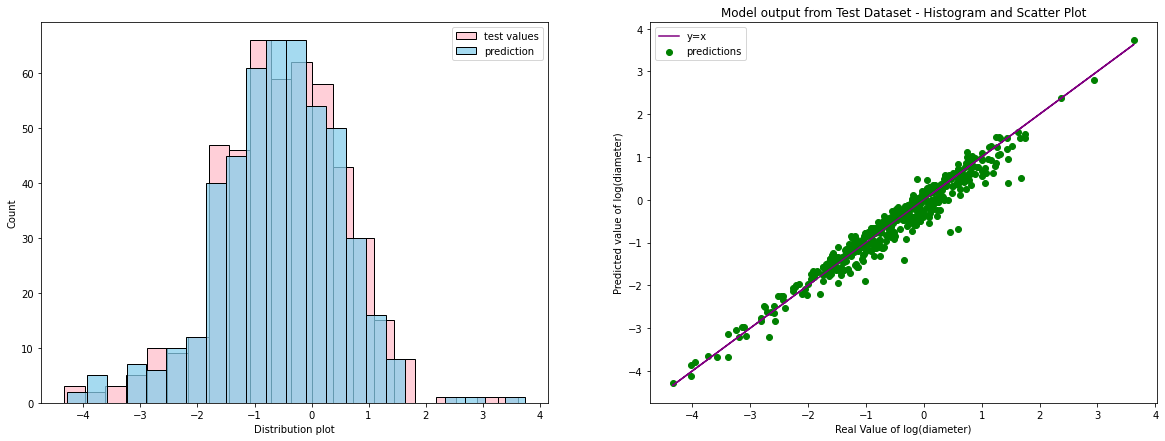

In [ ]:
X_test_standardised_4 = X_test_standardised[['abs_mag', 'albedo', 'period', 'aphelion_distance']]

Y_predicted_svm_4_test = svmreg4.predict(X_test_standardised_4) # predicting from test data

plot_test(Y_predicted_svm_4_test)

r2_score_svm_4_test= r2_score(Y_predicted_svm_4_test,Y_test)
disp_r2_score(r2_score_svm_4_test)

RMSE_svm_4_test = math.sqrt(mean_squared_error(Y_test, Y_predicted_svm_4_test))
disp_RMSE(RMSE_svm_4_test)

MAE_svm_4_test = mean_absolute_error(Y_test, Y_predicted_svm_4_test)
disp_MAE(MAE_svm_4_test)

final_comparison_titles.append('Final SVM Regression Model')
final_comparison_r2.append(r2_score_svm_4_test)
final_comparison_RMSE.append(RMSE_svm_4_test)
final_comparison_MAE.append(MAE_svm_4_test)

# NASA vs. Final SVM comparison

In [ ]:
nasa_df = X_test[['albedo', 'abs_mag']] # use unstandardised values!!
nasa_df["nasa_log_d"] = np.log(10**(3.1236 - 0.5*(np.log10(nasa_df['albedo'])) - (0.2*(nasa_df['abs_mag']))))
from sklearn.preprocessing import StandardScaler

print(nasa_df)

      albedo  abs_mag  nasa_log_d
218    0.429    16.52    0.007763
353    0.250    15.34    0.821171
53     0.405    15.32    0.589168
286    0.319    18.64   -0.820400
652    0.160    18.30   -0.318816
...      ...      ...         ...
213    0.048    17.84    0.495008
257    0.252    16.25    0.398116
201    0.232    15.94    0.582222
1171   0.072    21.05   -1.185984
832    0.176    21.70   -1.932229

[481 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


R-squared score: 0.9841
Root Mean Squared Error: 0.1373
Mean Absolute Error: 0.0697


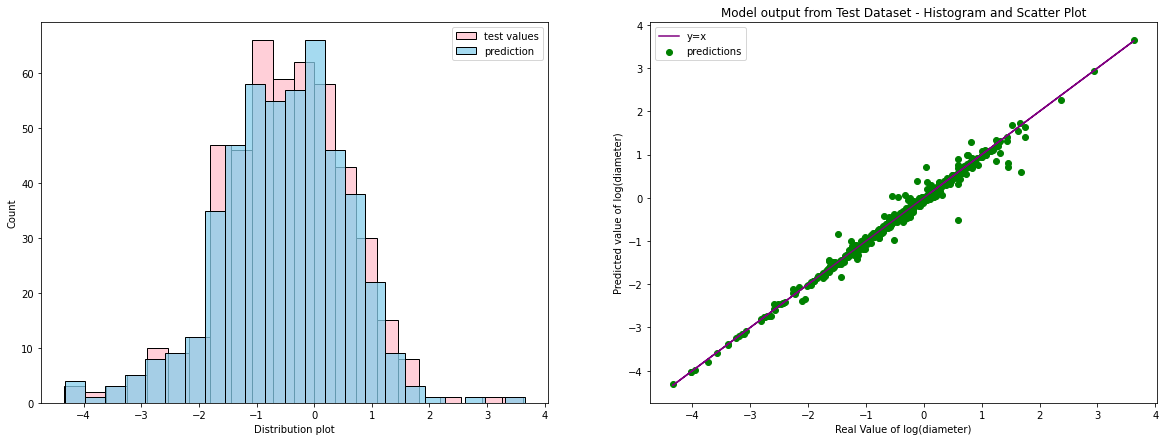

In [ ]:
combined_data = {'SVM d':[Y_predicted_svm_4_test][0], 'NASA log d':[nasa_df['nasa_log_d'].to_numpy()][0], 'Real d':[Y_test.to_numpy()][0]}
df_comp = pd.DataFrame(combined_data)

#from tabulate import tabulate
#print(tabulate(df_comp, headers='keys', tablefmt='psql'))

plot_test(df_comp['NASA log d'])

nasa_r2_score= r2_score(nasa_df['nasa_log_d'],Y_test)
disp_r2_score(nasa_r2_score)

nasa_RMSE = math.sqrt(mean_squared_error(Y_test, nasa_df['nasa_log_d']))
disp_RMSE(nasa_RMSE)

nasa_MAE = mean_absolute_error(Y_test, nasa_df['nasa_log_d'])
disp_MAE(nasa_MAE)

final_comparison_titles.append('NASAs Model')
final_comparison_r2.append(nasa_r2_score)
final_comparison_RMSE.append(nasa_RMSE)
final_comparison_MAE.append(nasa_MAE)

In [ ]:
table_data = list(zip(final_comparison_titles, final_comparison_r2, final_comparison_RMSE, final_comparison_MAE))
pd.DataFrame(table_data, columns=['','R^2 Score', 'Root Mean Square Error', 'Mean Absolute Error'])

,,R^2 Score,Root Mean Square Error,Mean Absolute Error
0,Final SVM Regression Model,0.944471,0.249745,0.187822
1,NASAs Model,0.984143,0.137348,0.069719
